In [29]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [5]:
print(x1_train.shape)
print(x2_train.shape)
print(x3_train.shape)
print(y_train.shape)

torch.Size([5, 1])
torch.Size([5, 1])
torch.Size([5, 1])
torch.Size([5, 1])


In [6]:
# 모델 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = torch.optim.SGD([w1, w2, w3, b], lr=1e-5)

epochs = 1000
for epoch in range(epochs +1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    
    # COST 계산
    cost = torch.mean((hypothesis - y_train) **2)
    
    # cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, w1.item(), w3.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.297 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.676 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.678 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.678 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.079378


## Matrix Data

In [7]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [8]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [9]:
# 모델 초기화
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = torch.optim.SGD([W, b], lr=1e-5)

epochs = 20
for epoch in range(epochs +1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train)**2)
    
    # cost로 H(x)계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:6f}'.format(epoch, epochs, hypothesis.squeeze().detach(), cost.item()))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7968, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936005
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371010
Epoch    6/20 hypothesis: tensor([148.1035, 178.0144, 175.3980, 191.0042, 135.7812]) Cost: 29.758139
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8508, 193.6753, 137.6805]) Cost: 10.445305
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391228
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493135
Epoch   10/20 hypo

## Hige-level Implementation with nn.Module

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self, x):
        return self.linear(x)

In [11]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
        
    def forward(self, x):
        return self.linear(x)

In [14]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

epochs = 20
loss = []
for epoch in range(epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = torch.nn.functional.mse_loss(prediction, y_train)
    
    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, epochs, cost.item()
    ))
    loss.append(cost.item())

Epoch    0/20 Cost: 5591.856445
Epoch    1/20 Cost: 1753.974976
Epoch    2/20 Cost: 551.001831
Epoch    3/20 Cost: 173.933594
Epoch    4/20 Cost: 55.741814
Epoch    5/20 Cost: 18.694431
Epoch    6/20 Cost: 7.081518
Epoch    7/20 Cost: 3.440825
Epoch    8/20 Cost: 2.299160
Epoch    9/20 Cost: 1.940687
Epoch   10/20 Cost: 1.827758
Epoch   11/20 Cost: 1.791787
Epoch   12/20 Cost: 1.779916
Epoch   13/20 Cost: 1.775618
Epoch   14/20 Cost: 1.773695
Epoch   15/20 Cost: 1.772515
Epoch   16/20 Cost: 1.771571
Epoch   17/20 Cost: 1.770713
Epoch   18/20 Cost: 1.769836
Epoch   19/20 Cost: 1.769001
Epoch   20/20 Cost: 1.768161


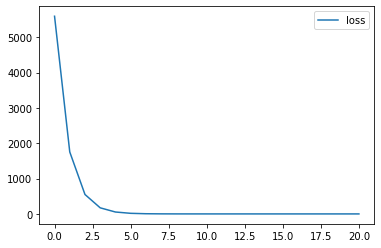

In [16]:
plt.plot(loss)
plt.legend(['loss'])
plt.show()

# Load Data

### Slicing 1D Array

In [17]:
nums = [0, 1, 2, 3, 4]

In [18]:
print(nums)

[0, 1, 2, 3, 4]


In [20]:
print(nums[2:4])

[2, 3]


In [21]:
print(nums[2:])

[2, 3, 4]


In [22]:
print(nums[:2])

[0, 1]


In [23]:
print(nums[:])

[0, 1, 2, 3, 4]


**마지막 index전까지 가져와라 (뒤는 미포함!!!)**

In [25]:
print(nums[:-1]) 

[0, 1, 2, 3]


In [27]:
nums[2:4] = [8,9]

In [28]:
print(nums)

[0, 1, 8, 9, 4]


## Slicing 2D Array

In [30]:
b = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

In [31]:
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [32]:
b[:, 1] # 두번째 세로줄 다 뽑기

array([ 2,  6, 10])

In [33]:
b[-1] # 마지막 인덱스 반환

array([ 9, 10, 11, 12])

In [34]:
b[-1, :]

array([ 9, 10, 11, 12])

In [35]:
b[-1, ...]

array([ 9, 10, 11, 12])

In [36]:
b[0:2, :]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

## Loading Data from .csv file

In [37]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)

In [38]:
print(xy.shape)

(25, 4)


In [39]:
print(xy)

[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]


In [44]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [45]:
print(x_data.shape)
print(y_data.shape)

(25, 3)
(25, 1)


In [46]:
print(y_data.shape)
print(len(y_data))
print(y_data[:5])

(25, 1)
25
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]


## Low-level Implementation

In [49]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = torch.optim.SGD([W, b], lr=1e-5)

epochs = 20
for epoch in range(epochs+1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W)+b
    
    # cost 계산
    cost = torch.mean((hypothesis-y_train)**2)
    
    # cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost:{:.6f}'.format(
        epoch, epochs, cost.item()
    ))

Epoch    0/20 Cost:26811.960938
Epoch    1/20 Cost:9920.530273
Epoch    2/20 Cost:3675.298828
Epoch    3/20 Cost:1366.260498
Epoch    4/20 Cost:512.542419
Epoch    5/20 Cost:196.896622
Epoch    6/20 Cost:80.190987
Epoch    7/20 Cost:37.038692
Epoch    8/20 Cost:21.081335
Epoch    9/20 Cost:15.178760
Epoch   10/20 Cost:12.993677
Epoch   11/20 Cost:12.183030
Epoch   12/20 Cost:11.880535
Epoch   13/20 Cost:11.765964
Epoch   14/20 Cost:11.720856
Epoch   15/20 Cost:11.701438
Epoch   16/20 Cost:11.691510
Epoch   17/20 Cost:11.685122
Epoch   18/20 Cost:11.680007
Epoch   19/20 Cost:11.675372
Epoch   20/20 Cost:11.670942


## High-level Implementation with nn.Module

In [50]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
        
    def forward(self, x):
        return self.linear(x)

In [52]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
model = MultivariateLinearRegressionModel()

# optimizer설정
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

epochs = 20
for epoch in range(epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = torch.nn.functional.mse_loss(prediction, y_train)
    
    # cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, epochs, cost.item()
    ))

Epoch    0/20 Cost: 30118.455078
Epoch    1/20 Cost: 11147.715820
Epoch    2/20 Cost: 4133.702637
Epoch    3/20 Cost: 1540.422852
Epoch    4/20 Cost: 581.609985
Epoch    5/20 Cost: 227.105835
Epoch    6/20 Cost: 96.030457
Epoch    7/20 Cost: 47.563221
Epoch    8/20 Cost: 29.638653
Epoch    9/20 Cost: 23.006411
Epoch   10/20 Cost: 20.549322
Epoch   11/20 Cost: 19.635849
Epoch   12/20 Cost: 19.293119
Epoch   13/20 Cost: 19.161427
Epoch   14/20 Cost: 19.107742
Epoch   15/20 Cost: 19.082924
Epoch   16/20 Cost: 19.068764
Epoch   17/20 Cost: 19.058550
Epoch   18/20 Cost: 19.049807
Epoch   19/20 Cost: 19.041584
Epoch   20/20 Cost: 19.033607


## Pandas Loader

In [53]:
import pandas as pd

In [56]:
pf = pd.read_csv('data-01-test-score.csv')

In [57]:
print(pf)

    73  80   75  152
0   93  88   93  185
1   89  91   90  180
2   96  98  100  196
3   73  66   70  142
4   53  46   55  101
5   69  74   77  149
6   47  56   60  115
7   87  79   90  175
8   79  70   88  164
9   69  70   73  141
10  70  65   74  141
11  93  95   91  184
12  79  80   73  152
13  70  73   78  148
14  93  89   96  192
15  78  75   68  147
16  81  90   93  183
17  88  92   86  177
18  78  83   77  159
19  82  86   90  177
20  86  82   89  175
21  78  83   85  175
22  76  83   71  149
23  96  93   95  192


In [61]:
pf[:5]

,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101


In [63]:
pf[:1]

,73,80,75,152
0,93,88,93,185


In [64]:
pf[1:]

,73,80,75,152
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101
5,69,74,77,149
6,47,56,60,115
7,87,79,90,175
8,79,70,88,164
9,69,70,73,141
10,70,65,74,141
